### How can we convert the pdb graph to glycowork graph?


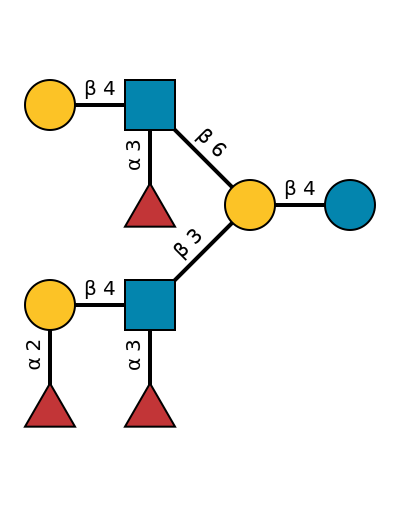

In [32]:
from glycowork.motif.draw import GlycoDraw

GlycoDraw("Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)]Gal(b1-4)Glc")

## Glycowork graph

In [33]:
from glycowork.motif.graph import  glycan_to_nxGraph

glycan_to_nxGraph('Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)]Gal(b1-4)Glc').__dict__


{'graph': {},
 '_node': {0: {'string_labels': 'Fuc'},
  1: {'string_labels': 'a1-2'},
  2: {'string_labels': 'Gal'},
  3: {'string_labels': 'b1-4'},
  4: {'string_labels': 'Fuc'},
  5: {'string_labels': 'a1-3'},
  6: {'string_labels': 'GlcNAc'},
  7: {'string_labels': 'b1-3'},
  8: {'string_labels': 'Fuc'},
  9: {'string_labels': 'a1-3'},
  10: {'string_labels': 'Gal'},
  11: {'string_labels': 'b1-4'},
  12: {'string_labels': 'GlcNAc'},
  13: {'string_labels': 'b1-6'},
  14: {'string_labels': 'Gal'},
  15: {'string_labels': 'b1-4'},
  16: {'string_labels': 'Glc'}},
 '_adj': {0: {1: {}},
  1: {0: {}, 2: {}},
  2: {1: {}, 3: {}},
  3: {2: {}, 6: {}},
  4: {5: {}},
  5: {4: {}, 6: {}},
  6: {3: {}, 5: {}, 7: {}},
  7: {6: {}, 14: {}},
  8: {9: {}},
  9: {8: {}, 12: {}},
  10: {11: {}},
  11: {10: {}, 12: {}},
  12: {9: {}, 11: {}, 13: {}},
  13: {12: {}, 14: {}},
  14: {7: {}, 13: {}, 15: {}},
  15: {14: {}, 16: {}},
  16: {15: {}}},
 '__networkx_cache__': {},
 'edges': EdgeView([(0, 1), 

## PDB graph

In [29]:
import pickle
def load_data_pdb():
    flex_data_path = '/Users/xakdze/PycharmProjects/GlyContact_analyses/data/glycan_graphs.pkl'

    """Load glycan flexibility data and binding data."""
    with open(flex_data_path, 'rb') as file:
        flex_data = pickle.load(file)
    return flex_data

flex_data_pdb_g =  load_data_pdb()


## create_glycontact_annotated_graph

In [30]:
import networkx as nx


def create_glycontact_annotated_graph(glycan: str, flex_data_pdb_g: dict = flex_data_pdb_g) -> nx.Graph:
    """Create a glyco-contact annotated graph with flexibility attributes."""
    glycowork_graph = glycan_to_nxGraph(glycan)
    num_nodes = len(glycowork_graph) - 1
    mapper = {gcontact: gwork for gwork, gcontact in zip(range(num_nodes, -1, -2), range(2, num_nodes))}

    try:
        node_attributes = {node: flex_data_pdb_g[glycan].nodes[node]
                           for node in flex_data_pdb_g[glycan].nodes}
    except KeyError:
        raise KeyError(f'The glycan {glycan} is not present in the flex database')

    # Map attributes to the glycowork graph nodes
    flex_attribute_mapping = {
        mapper[gcontact_node]: attributes
        for gcontact_node, attributes in node_attributes.items()
        if gcontact_node in mapper
    }

    # Assign the mapped attributes to the glycowork graph
    nx.set_node_attributes(glycowork_graph, flex_attribute_mapping)
    return glycowork_graph

create_glycontact_annotated_graph("Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)]Gal(b1-4)Glc").__dict__


{'graph': {},
 '_node': {0: {'string_labels': 'Fuc',
   'Monosaccharide': 'Fuc(a1-3)',
   'Mean Score': 1.8676189828198404,
   'Median Score': 1.8176706893136725,
   'Weighted Score': 1.9261586474572951,
   'weighted_mean_flexibility': 16.641286591340865},
  1: {'string_labels': 'a1-2'},
  2: {'string_labels': 'Gal',
   'Monosaccharide': 'Fuc(a1-2)',
   'Mean Score': 1.9629103216109798,
   'Median Score': 2.0159400925040245,
   'Weighted Score': 1.94111501673313,
   'weighted_mean_flexibility': 20.127824177582237},
  3: {'string_labels': 'b1-4'},
  4: {'string_labels': 'Fuc',
   'Monosaccharide': 'Gal(b1-4)',
   'Mean Score': 1.7647929069120436,
   'Median Score': 1.7578037350904197,
   'Weighted Score': 1.7861381799561076,
   'weighted_mean_flexibility': 15.575945445455453},
  5: {'string_labels': 'a1-3'},
  6: {'string_labels': 'GlcNAc',
   'Monosaccharide': 'GlcNAc(b1-3)',
   'Mean Score': 1.6338292866479605,
   'Median Score': 1.6407650627661496,
   'Weighted Score': 1.592153641009

In [31]:
flex_data_pdb_g["Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)]Gal(b1-4)Glc"].__dict__

{'graph': {},
 '_node': {2: {'Monosaccharide': 'Glc(b1-1)',
   'Mean Score': 2.0514767858432608,
   'Median Score': 2.244769612327218,
   'Weighted Score': 2.128792897366927,
   'weighted_mean_flexibility': 12.17857534246575},
  1: {'Monosaccharide': '-R',
   'Mean Score': 0.46870365738868713,
   'Median Score': 0.5194512158632278,
   'Weighted Score': 0.492240047726902,
   'weighted_mean_flexibility': 21.947800819918005},
  4: {'Monosaccharide': 'GlcNAc(b1-6)',
   'Mean Score': 1.773262549820356,
   'Median Score': 1.6837695762515068,
   'Weighted Score': 1.7021496458169612,
   'weighted_mean_flexibility': 17.064866673332663},
  3: {'Monosaccharide': 'Gal(b1-4)',
   'Mean Score': 1.0813572494313122,
   'Median Score': 1.0846662780968472,
   'Weighted Score': 1.0457681036238264,
   'weighted_mean_flexibility': 6.275166123387661},
  8: {'Monosaccharide': 'Gal(b1-4)',
   'Mean Score': 1.7647929069120436,
   'Median Score': 1.7578037350904197,
   'Weighted Score': 1.7861381799561076,
   '